# Pengujian Perbandingan dengan SkLearn MLP

Pengujian bertujuan untuk membandingkan hasil MLP SkLearn dengan FFNN buat kami.

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
import time

# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

%load_ext autoreload
%autoreload 2

from model import FFNN
from activation import ReLU, Softmax
from loss import CategoricalCrossEntropy
from utils import load_mnist_data

# Create out dir
os.makedirs("../../out", exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def train_and_evaluate_ffnn(model, X_train, X_test, y_train_onehot, y_test, y_test_onehot, 
                          epochs=10, batch_size=32, learning_rate=0.01):
    """
    Train and evaluate our FFNN model
    """
    print("\nTraining custom FFNN model...")
    start_time = time.time()
    
    history = model.fit(
        X_train, 
        y_train_onehot,
        batch_size=batch_size,
        learning_rate=learning_rate,
        epochs=epochs,
        validation_data=(X_test, y_test_onehot),
        verbose=1
    )
    
    training_time = time.time() - start_time
    print(f"FFNN training took {training_time:.2f} seconds")
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    
    print(f"FFNN accuracy: {accuracy:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    
    return history, accuracy, training_time, y_pred_classes, cm

In [ ]:
def train_and_evaluate_sklearn(hidden_layers, X_train, X_test, y_train, y_test, 
                              max_iter=10, learning_rate_init=0.01, batch_size=32):
    """
    Train and evaluate sklearn's MLPClassifier
    """
    print("\nTraining sklearn MLPClassifier...")
    
    # Create sklearn MLP model with comparable hyperparameters
    sklearn_model = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation='relu',            # ReLU activation for hidden layers
        solver='sgd',                 # Stochastic gradient descent
        alpha=0.0001,                 # L2 penalty (regularization term)
        batch_size=batch_size,        
        learning_rate='constant',     # Constant learning rate
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,            # Number of epochs
        random_state=42,
        verbose=True
    )
    
    start_time = time.time()
    sklearn_model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"sklearn MLPClassifier training took {training_time:.2f} seconds")
    
    # Make predictions and calculate accuracy
    y_pred = sklearn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"sklearn MLPClassifier accuracy: {accuracy:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Get loss curve from sklearn model
    loss_history = {'loss': sklearn_model.loss_curve_}
    
    return loss_history, accuracy, training_time, y_pred, cm

In [5]:
def plot_confusion_matrix(cm, classes, title, filename):
    """
    Plot confusion matrix
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(filename)


Loading MNIST dataset...
Data loaded: X_train: (8000, 784), y_train: (8000,)
Test data: X_test: (2000, 784), y_test: (2000,)

Training custom FFNN model...


Epoch 1/10: 100%|██████████| 250/250 [00:12<00:00, 19.82batch/s, loss=0.4530]


Epoch 1/10 - loss: 0.4912, val_loss: 0.3990


Epoch 2/10: 100%|██████████| 250/250 [00:15<00:00, 15.74batch/s, loss=0.1649]


Epoch 2/10 - loss: 0.2583, val_loss: 0.3373


Epoch 3/10: 100%|██████████| 250/250 [00:18<00:00, 13.76batch/s, loss=0.0101]


Epoch 3/10 - loss: 0.1898, val_loss: 0.3275


Epoch 4/10: 100%|██████████| 250/250 [00:21<00:00, 11.60batch/s, loss=0.0895]


Epoch 4/10 - loss: 0.1673, val_loss: 0.3450


Epoch 5/10: 100%|██████████| 250/250 [00:23<00:00, 10.61batch/s, loss=0.0511]


Epoch 5/10 - loss: 0.1398, val_loss: 0.4045


Epoch 6/10: 100%|██████████| 250/250 [00:13<00:00, 18.68batch/s, loss=0.0195]


Epoch 6/10 - loss: 0.1312, val_loss: 0.3699


Epoch 7/10: 100%|██████████| 250/250 [00:11<00:00, 20.88batch/s, loss=0.0199]


Epoch 7/10 - loss: 0.1169, val_loss: 0.4195


Epoch 8/10: 100%|██████████| 250/250 [00:08<00:00, 28.56batch/s, loss=0.5198]


Epoch 8/10 - loss: 0.1122, val_loss: 0.4771


Epoch 9/10: 100%|██████████| 250/250 [00:11<00:00, 21.30batch/s, loss=0.2008]


Epoch 9/10 - loss: 0.0993, val_loss: 0.4202


Epoch 10/10: 100%|██████████| 250/250 [00:10<00:00, 23.44batch/s, loss=0.0274]


Epoch 10/10 - loss: 0.1060, val_loss: 0.4736
FFNN training took 148.75 seconds
FFNN accuracy: 0.9215

Training sklearn MLPClassifier...
Iteration 1, loss = 0.68137421
Iteration 2, loss = 0.29356062
Iteration 3, loss = 0.22141183
Iteration 4, loss = 0.17375125
Iteration 5, loss = 0.13678992
Iteration 6, loss = 0.10507171
Iteration 7, loss = 0.08458318
Iteration 8, loss = 0.06530784
Iteration 9, loss = 0.04728250
Iteration 10, loss = 0.03933839
sklearn MLPClassifier training took 22.46 seconds
sklearn MLPClassifier accuracy: 0.9415


/home/dewodt/Documents/informatics/repositories/college/semester-6/pembelajaran-mesin/FFNN/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


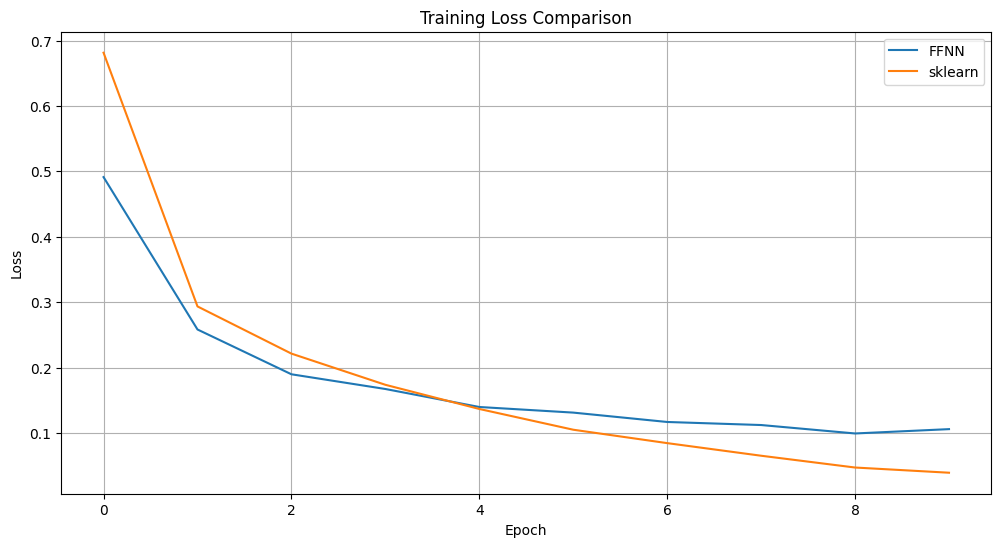

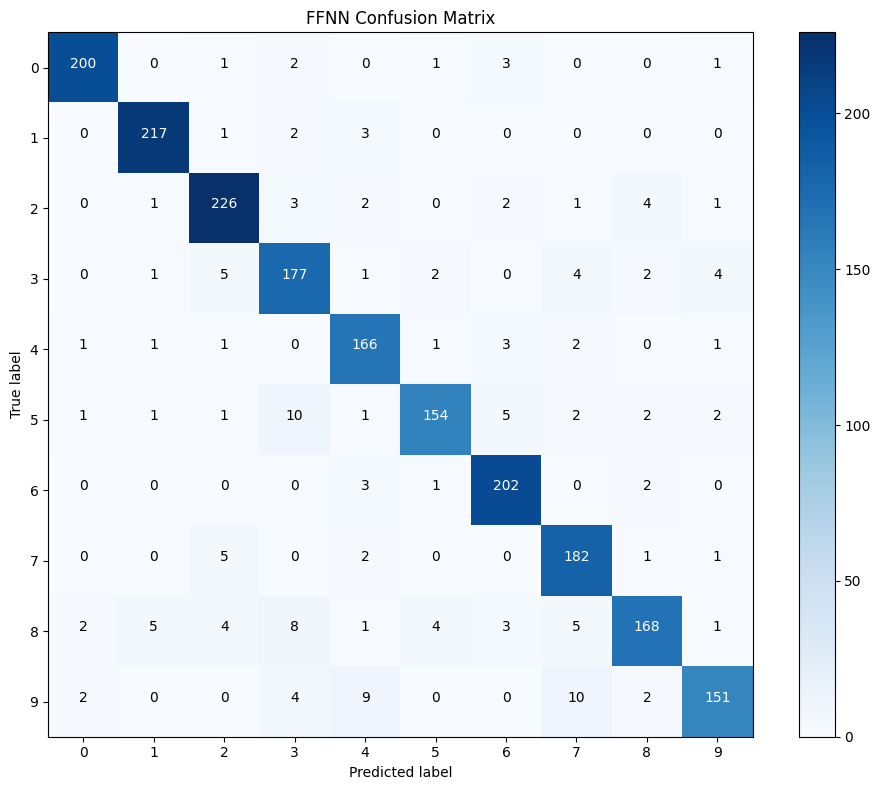

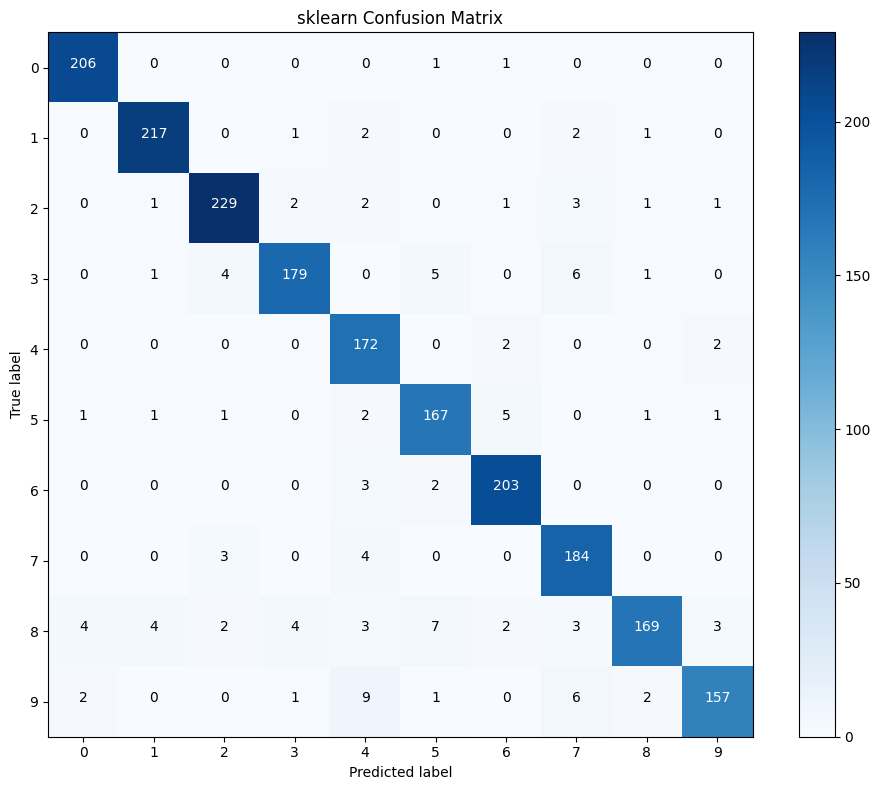

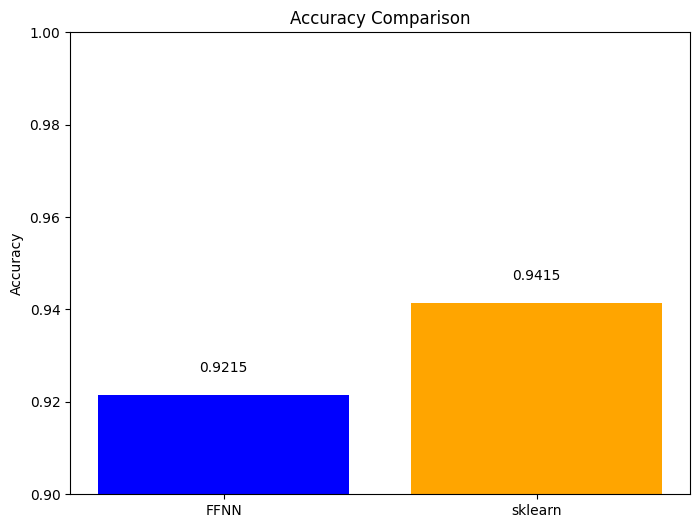

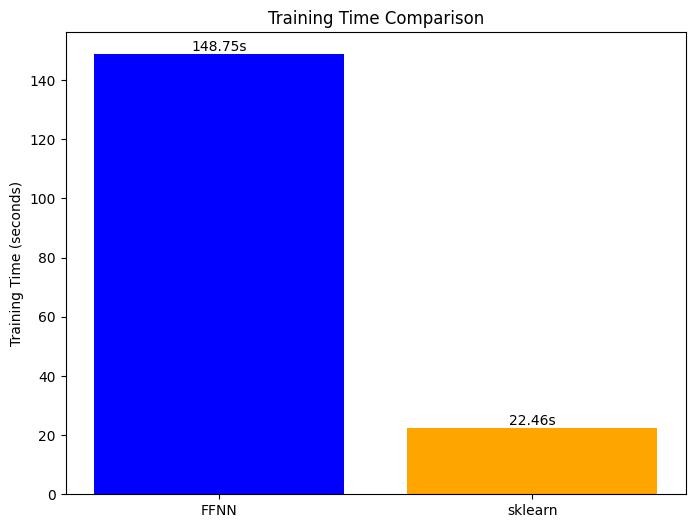

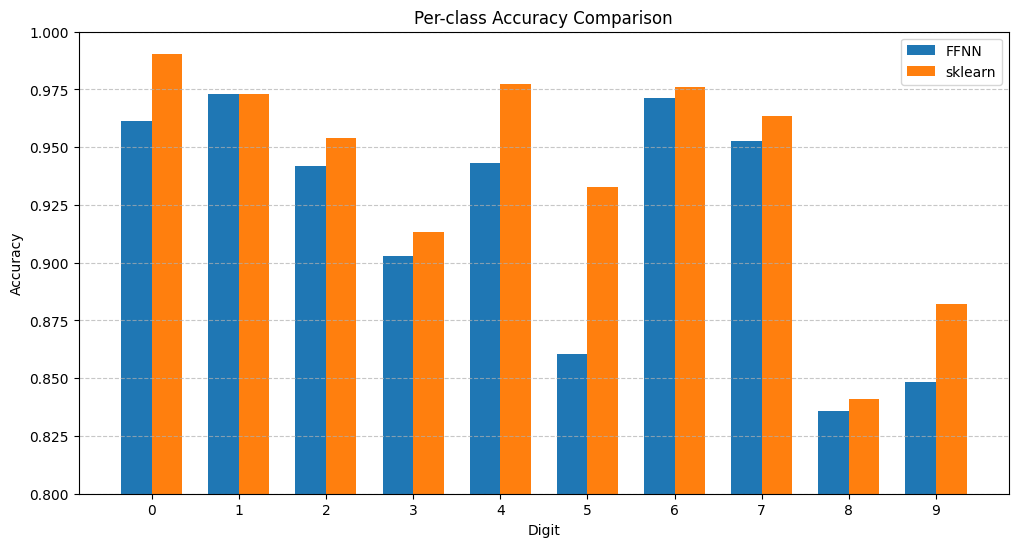

In [6]:
# Load MNIST dataset
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_data(subset_size=10000)

input_size = X_train.shape[1]  # 784 for MNIST
output_size = y_train_onehot.shape[1]  # 10 for MNIST

# Define hidden layer structure (two hidden layers)
hidden_sizes = [128, 64]

# Common hyperparameters for both models
epochs = 10
batch_size = 32
learning_rate = 0.01

# Train and evaluate our FFNN model
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=[ReLU(), ReLU(), Softmax()],
    loss=CategoricalCrossEntropy()
)

ffnn_history, ffnn_accuracy, ffnn_time, ffnn_pred, ffnn_cm = train_and_evaluate_ffnn(
    ffnn_model, X_train, X_test, y_train_onehot, y_test, y_test_onehot,
    epochs=epochs, batch_size=batch_size, learning_rate=learning_rate
)

# Train and evaluate sklearn's MLPClassifier
sklearn_history, sklearn_accuracy, sklearn_time, sklearn_pred, sklearn_cm = train_and_evaluate_sklearn(
    hidden_sizes, X_train, X_test, y_train, y_test,
    max_iter=epochs, learning_rate_init=learning_rate, batch_size=batch_size
)

# Plot loss curves for both models
plt.figure(figsize=(12, 6))
plt.plot(ffnn_history['loss'], label='FFNN')

# Map sklearn iterations to our epochs
x_sklearn = np.linspace(0, len(ffnn_history['loss'])-1, len(sklearn_history['loss']))
plt.plot(x_sklearn, sklearn_history['loss'], label='sklearn')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('../../out/sklearn_comparison_loss.png')

# Plot confusion matrices
digits = list(range(10))  # Class labels for MNIST
plot_confusion_matrix(ffnn_cm, digits, "FFNN Confusion Matrix", '../../out/ffnn_confusion_matrix.png')
plot_confusion_matrix(sklearn_cm, digits, "sklearn Confusion Matrix", '../../out/sklearn_confusion_matrix.png')

# Bar chart comparing accuracies
plt.figure(figsize=(8, 6))
plt.bar(['FFNN', 'sklearn'], [ffnn_accuracy, sklearn_accuracy], color=['blue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])

for i, v in enumerate([ffnn_accuracy, sklearn_accuracy]):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')

plt.savefig('../../out/sklearn_comparison_accuracy.png')

# Bar chart comparing training times
plt.figure(figsize=(8, 6))
plt.bar(['FFNN', 'sklearn'], [ffnn_time, sklearn_time], color=['blue', 'orange'])
plt.title('Training Time Comparison')
plt.ylabel('Training Time (seconds)')

for i, v in enumerate([ffnn_time, sklearn_time]):
    plt.text(i, v + 1, f"{v:.2f}s", ha='center')

plt.savefig('../../out/sklearn_comparison_time.png')

ffnn_class_accuracy = np.zeros(10)
sklearn_class_accuracy = np.zeros(10)

for i in range(10):
    class_indices = (y_test == i)
    ffnn_class_accuracy[i] = accuracy_score(y_test[class_indices], ffnn_pred[class_indices])
    sklearn_class_accuracy[i] = accuracy_score(y_test[class_indices], sklearn_pred[class_indices])

# Per-class accuracies
plt.figure(figsize=(12, 6))
x = np.arange(10)
width = 0.35

plt.bar(x - width/2, ffnn_class_accuracy, width, label='FFNN')
plt.bar(x + width/2, sklearn_class_accuracy, width, label='sklearn')

plt.title('Per-class Accuracy Comparison')
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.xticks(x, digits)
plt.legend()
plt.ylim([0.8, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../../out/sklearn_comparison_per_class.png')

In [7]:
print(f"\nFFNN Accuracy: {ffnn_accuracy:.4f}")
print(f"sklearn MLPClassifier Accuracy: {sklearn_accuracy:.4f}")
print(f"Accuracy Difference: {abs(ffnn_accuracy - sklearn_accuracy):.4f}")

print(f"\nFFNN Training Time: {ffnn_time:.2f} seconds")
print(f"sklearn Training Time: {sklearn_time:.2f} seconds")

print("\nPer-class Accuracy Comparison:")
for i in range(10):
    print(f"Digit {i}: FFNN = {ffnn_class_accuracy[i]:.4f}, sklearn = {sklearn_class_accuracy[i]:.4f}, " +
            f"Diff = {abs(ffnn_class_accuracy[i] - sklearn_class_accuracy[i]):.4f}")


FFNN Accuracy: 0.9215
sklearn MLPClassifier Accuracy: 0.9415
Accuracy Difference: 0.0200

FFNN Training Time: 148.75 seconds
sklearn Training Time: 22.46 seconds

Per-class Accuracy Comparison:
Digit 0: FFNN = 0.9615, sklearn = 0.9904, Diff = 0.0288
Digit 1: FFNN = 0.9731, sklearn = 0.9731, Diff = 0.0000
Digit 2: FFNN = 0.9417, sklearn = 0.9542, Diff = 0.0125
Digit 3: FFNN = 0.9031, sklearn = 0.9133, Diff = 0.0102
Digit 4: FFNN = 0.9432, sklearn = 0.9773, Diff = 0.0341
Digit 5: FFNN = 0.8603, sklearn = 0.9330, Diff = 0.0726
Digit 6: FFNN = 0.9712, sklearn = 0.9760, Diff = 0.0048
Digit 7: FFNN = 0.9529, sklearn = 0.9634, Diff = 0.0105
Digit 8: FFNN = 0.8358, sklearn = 0.8408, Diff = 0.0050
Digit 9: FFNN = 0.8483, sklearn = 0.8820, Diff = 0.0337
